In [1]:
# Le perceptron

In [ ]:
# Le perceptron est la base d'un réseau de neurones. Il réalise
# une transformation linéaire d'une fonction d'activation telle que

# y = σ(Wx+b)
# où y est la sortie du perceptron, σ est une fonction d'activation
# W est la matrice des poids, b est le biais et x est l'ensemble des
# entrées du perceptron.

# Le perceptron a deux types de paramètres, les poids et le biais.
# Chaque poids mesure l’importance de la caractéristique. Le biais 
# déplace la frontière de décision.

# Avec PyTorch
from torch import tensor, no_grad
from torch.nn import Linear, L1Loss
from torch.optim import Adam

x = tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1]], requires_grad=True)
y = tensor([[0.], [0.], [0.], [1.]], requires_grad=True)

model = Linear(2, 1, bias=True)
criterion = L1Loss()
optimizer = Adam(model.parameters(), lr=1e-2)

for _ in range(500):
  optimizer.zero_grad()
  loss = criterion(model(x), y)
  loss.backward()
  optimizer.step()

with no_grad():
  print(model.weight, model.bias)

Parameter containing:
tensor([[0.0902, 0.5841]], requires_grad=True) Parameter containing:
tensor([-0.0130], requires_grad=True)


In [3]:
# Les fonctions d'activation

In [4]:
# Les fonctions d'activation permettent de résoudre des problèmes
# non-linéaires. Elles sont les suivantes :
# Sigmoïde : σ(x) = 1/[1+e^(-x)]
# Tangente hyperbolique : tanh(x) = [e^x-e^(-x)]/[e^x+e^(-x)]
# Rectified Linear Unit : ReLU(x) = max(0, x)
# Softmax : e^(x_i)/Σj[e^(x_j)]

# Attention, ReLU empêche d'avoir des sorties négatives, et Softmax 
# sortira un vecteur dont la somme chaque élément sera égale à 1.

# Exemples
from torch.nn import Sigmoid

x = tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1]], requires_grad=True)
y = tensor([[0.], [0.], [0.], [1.]], requires_grad=True)

# Activation linéaire :
model = Linear(2, 1, bias=True)
with no_grad():
  model.weight[:] = tensor([1., 1.], requires_grad=True)
  model.bias[:] = tensor([-1.5], requires_grad=True)

z = model(x)
print(z)

# Activation par sigmoïde :
sig = Sigmoid()
y_hat = sig(z)
print(y_hat)

# La sigmoïde permet de transformer des valeurs en un intervalle [0; 1]
# permettant ainsi de les interpréter en probabilités.

tensor([[-1.5000],
        [-0.5000],
        [-0.5000],
        [ 0.5000]], grad_fn=<AddmmBackward0>)
tensor([[0.1824],
        [0.3775],
        [0.3775],
        [0.6225]], grad_fn=<SigmoidBackward0>)


In [5]:
# Choisir la fonction d'activation

In [6]:
# Pour une sortie binaire, la sigmoïde est la plus adaptée, du fait de sa
# sortie comprise entre 0 et 1. La tanh est aussi adaptée, mais du fait de
# sa pente plus raide, va classifier plus strictement.
# Pour une sortie multi-classes, une sortie Softmax normalise les valeurs
# pour obtenir une distribution de probabilité.
# Pour des sorties continues ou pour moduler des valeurs, ReLU ou tanh sont
# adaptées.

# Impact sur l’apprentissage :
# Certaines fonctions d’activation influencent la vitesse de convergence. 
# Par exemple, la sigmoïde borne les sorties, ce qui peut réduire l’amplitude 
# des gradients et ralentir l’apprentissage pour de grandes valeurs absolues.

In [7]:
# Epochs

In [8]:
# Définitions :
# Itération : mise à jour des paramètres après avoir traité un exemple ou un batch.
# Batch : sous-ensemble d'exemples utilisé pour calculer la descente de gradient
# et la mise à jour des paramètres.
# Epoch : passage complet sur toutes les données d'apprentissage.

In [9]:
# Normalisation et Standardisation des données

In [10]:
# La normalisation consiste en la mise à l'échelle des données.
# x = (x_i - x_min)/(x_max - x_min)
# x est la valeur normalisée, x_min et x_max sont respectivement
# les valeurs minimales et maximales de la variable.

# Avec Pytorch
from torch.nn import BatchNorm1d

x = tensor([[1., 50.],[2., 60.],[3., 55.]])
x_min = x.min(dim=0).values
x_max = x.max(dim=0).values
x_norm = (x-x_min)/(x_max-x_min)
print(x_norm)

# La standardisation consiste à centrer et réduire des données.
# x = (x - μ) / σ
# où μ est la moyenne et σ l'écart-type de la variable.

# Avec Pytorch
stdzer = BatchNorm1d(num_features=2, affine=False)
x_std = stdzer(x)
print(x_std)

# La standardisation est souvent préférée à la normalisation, puisque 
# elle est plus robuste aux valeurs aberrantes et converge plus vite.

tensor([[0.0000, 0.0000],
        [0.5000, 1.0000],
        [1.0000, 0.5000]])
tensor([[-1.2247, -1.2247],
        [ 0.0000,  1.2247],
        [ 1.2247,  0.0000]])


In [11]:
# Réseaux de neurones multi-couches (ou Multi-Layer Perceptron : MLP)

In [12]:
# Les MLPs permettent la résolution de problèmes non linéaires. Ils sont
# composés de couches, une d'entrée, composée de features (nombre de 
# neurones d'entrée), une de sortie (souvent un seul neurone), et de 
# couches cachées (d'un nombre de neurones déterminé en fonction des
# données, à augmenter si le modèle n'arrive pas à converger correctement).

# Construire un modèle avec PyTorch
from torch.nn import Sequential, Linear, ReLU, Module

# Nous souhaitons avoir un modèle ayant une feature en entrée, deux 
# couches cachées de 10 et 5 neurones, une couche de sortie d'un neurone
# et la fonction d'activation ReLU. Voilà sa déclaration :
model = Sequential(
  Linear(1, 10), 
  ReLU(),
  Linear(10, 5), 
  ReLU(),
  Linear(5, 1) 
)

# La première couche transforme l'entrée en un tenseur de dimension 10.
# La deuxième couche réduit à 5 le nombre de dimensions.
# Chaque couche cachée est suivie d'une fonction d'activation, et
# conduit vers la couche finale, de sortie. Il est important de noter
# que le nombre de neurones d'entrée d'une couche doit être égal au
# nombre de neurones de sortie de la couche précédente.

# Il est aussi possible de créer une classe pour notre MLP :
class MLP(Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = Linear(1, 10), 
    self.fc2 = Linear(10, 5), 
    self.fc3 = Linear(5, 1),
    self.relu = ReLU()
  
  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
model = MLP()

# La classe est avantageuse, elle permet de séparer la définition du modèle
# et l'entraînement, ce qui rend le code plus clair et modulable.

In [13]:
# Exercice 1

C:\Users\Eqixo\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


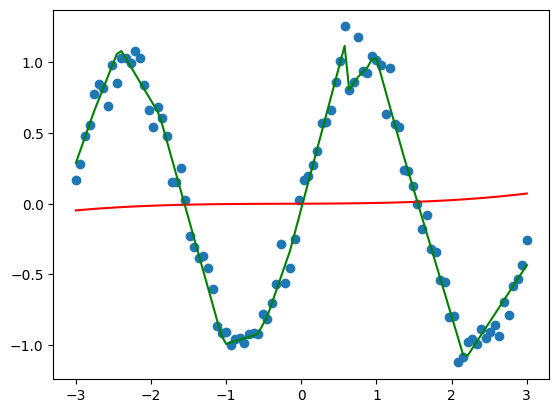

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)
X = torch.linspace(-3, 3, 100)
y_true = torch.sin(2*X) + 0.1 * torch.randn(X.size())
a, b, c, d = (tensor([0.], requires_grad=True) for _ in range(4))

class MLP(Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = Linear(1, 10)
    self.fc2 = Linear(10, 10)
    self.fc3 = Linear(10, 1)
    self.relu = ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    return self.fc3(x)

optimizer = Adam([a, b, c, d], lr=1e-2)
criterion = L1Loss()

for _ in range(5000):
  optimizer.zero_grad()
  y_pred = a * X ** 3 + b * X ** 2 + c * X + d
  loss = criterion(y_pred, y)
  loss.backward()
  optimizer.step()

model = MLP()
# Pense à créer un autre optimisateur avec les paramètres du modèle
# en 1er argument.
optimizer_MLP = Adam(model.parameters(), lr=1e-2)

for _ in range(5000):
  optimizer_MLP.zero_grad()
  # Penser à .unsqueeze(1) dans le modèle et squeezer après pour éviter
  # les warnings de calcul (problème d'échelle).
  loss = criterion(model(X.unsqueeze(1)).squeeze(), y_true)
  loss.backward()
  optimizer_MLP.step()

with no_grad():
  plt.scatter(X, y_true)
  plt.plot(X, y_pred, 'r')
  # Penser à (comme précédemment) .unsqueeze(1) dans le modèle et 
  # squeezer après, sans oublier de .detach() pour matplotlib, qui 
  # préfère fonctionner avec numpy.
  plt.plot(X, model(X.unsqueeze(1)).squeeze().detach(), 'g')
  plt.show()

In [15]:
# Broadcasting

In [16]:
# Le broadcasting est un mécanisme de permettant à PyTorch de faire des 
# opérations sur des tenseurs de tailles différentes. Cela permet de 
# vectoriser les calculs et de rendre le code plus simple et rapide.

In [ ]:
# Observer la loss et déterminer le nombre d'epochs

Arrêt à l'epoch : 322


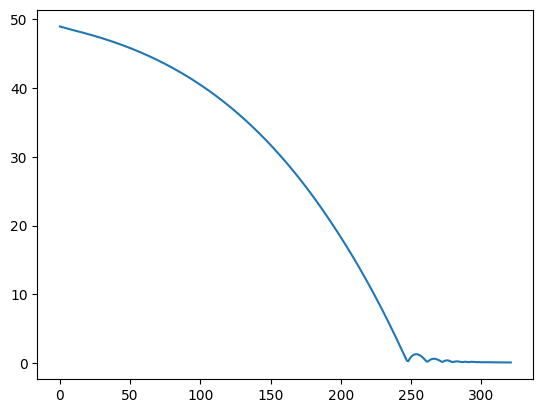

In [ ]:
# Lorsque l'on entraîne un modèle, observer la loss est crucial. Cela
# nous permet de savoir si le modèle apprend correctement.
# Dans l'exemple suivant, sous allons observer la loss et déterminer
# le nombre d'epochs approprié.

torch.manual_seed(0)
X = torch.tensor([[0.],[10.],[20.],[30.],[40.],[50.]])
y = 2*X + 1

# Pour suivre l'évolution de la loss, il faut créer une liste :
losses = []

class MLP(Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = Linear(1, 10)
    self.fc2 = Linear(10, 10)
    self.fc3 = Linear(10, 1)
    self.relu = ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    return self.fc3(x)

model = MLP()
optimizer = Adam(model.parameters(), lr=1e-3)
criterion = L1Loss()
epoch = 0

for _ in range(1000):
  epoch += 1
  optimizer.zero_grad()
  loss = criterion(model(X), y)
  loss.backward()
  optimizer.step()
  # Pendant l'entraînement, on ajoute la valeur de la loss dans la liste
  losses.append(loss)
  if loss < 0.1:
    print(f'Arrêt à l\'epoch : {epoch}')
    break

with no_grad():
  plt.plot(losses)
  plt.show()

In [19]:
# Profilage de modèle

In [20]:
# Il existe plusieurs outils pour profiler nos modèles :
# torchsummary, permet d'afficher l'architecture du modèle et 
# le nombre de paramètres par couche.
# torch.autograd.profiler, permet d'afficher les calculs des
# gradients et d'identifier les opérations coûteuses.

In [21]:
# Exercice 2

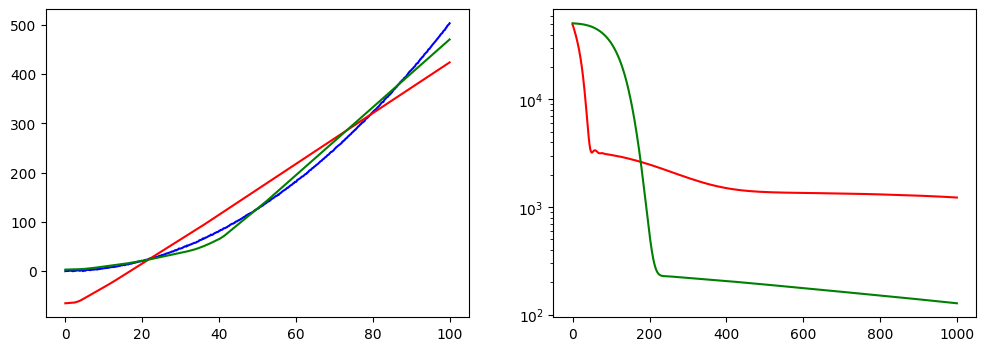

In [ ]:
from torch.nn import criterionLoss

N = 500
X1 = torch.linspace(0, 1, N).unsqueeze(1)
X2 = torch.linspace(0, 100, N).unsqueeze(1)
X = torch.cat([X1, X2], dim=1)
y = 3*X1 + 0.05*X2**2 + torch.randn(N,1) * 0.5

stdzer = BatchNorm1d(num_features=2, affine=False)
X_std = stdzer(X)

class MLP(Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = Linear(2, 20)
    self.fc2 = Linear(20, 1)
    self.relu = ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    return self.fc2(x)

model = MLP()
model_std = MLP()
criterion = criterionLoss()

optimizer = Adam(model.parameters(), lr=1e-2)
optimizer_std = Adam(model_std.parameters(), lr=1e-2)

losses = []
losses_std = []

epoch = 0

for _ in range(1000):
  epoch += 1
  optimizer.zero_grad()
  optimizer_std.zero_grad()
  loss = criterion(model(X), y)
  loss_std = criterion(model_std(X_std), y)
  loss.backward()
  loss_std.backward()
  optimizer.step()
  optimizer_std.step()

  losses.append(loss)
  losses_std.append(loss_std)

  if loss < 0.1 and loss_std < 0.1:
    print(f'Arrêt à l\'epoch : {epoch}')
    break

with no_grad():
  idx = X[:,1].argsort()
  plt.figure(figsize=(12,4))

  plt.subplot(121)
  plt.plot(X[idx,1], y[idx], 'b')
  plt.plot(X[idx,1], model(X)[idx], 'r')
  plt.plot(X[idx,1], model_std(X_std)[idx],  'g')

  plt.subplot(122)
  plt.plot(losses, 'r')
  plt.plot(losses_std,  'g')
  plt.yscale('log')

  plt.show()

In [ ]:
# Exercice 3

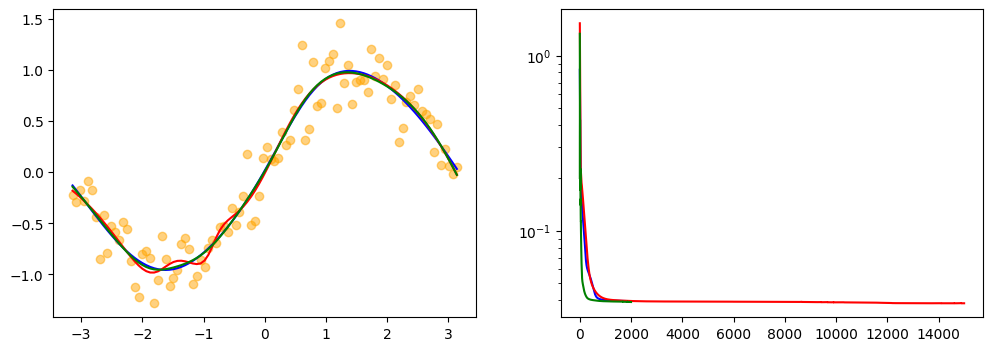

In [ ]:
from torch.nn import Tanh

torch.manual_seed(0)

N = 100
X = torch.linspace(-3.14, 3.14, N).unsqueeze(1)
y = torch.sin(X) + 0.2 * torch.randn_like(X)

class MLP(Module):
  def __init__(self, neurons):
    super(MLP, self).__init__()
    self.fc1 = Linear(1, neurons)
    self.fc2 = Linear(neurons, 1)
    self.tanh = Tanh()

  def forward(self, x):
    x = self.tanh(self.fc1(x))
    return self.fc2(x)

model_s = MLP(neurons=5)
model_s_over = MLP(neurons=5)
model_l = MLP(neurons=50)

criterion = criterionLoss()
optimizer_s = Adam(model_s.parameters(), lr=1e-2)
optimizer_s_over = Adam(model_s_over.parameters(), lr=1e-2)
optimizer_l = Adam(model_l.parameters(), lr=1e-2)

losses_s = []
losses_s_over = []
losses_l = []

for i in range(15000):
  if i < 2000:
    optimizer_s.zero_grad()
    optimizer_l.zero_grad()
    loss_s = criterion(model_s(X), y)
    loss_l = criterion(model_l(X), y)
    loss_s.backward()
    loss_l.backward()
    optimizer_s.step()
    optimizer_l.step()
    losses_s.append(loss_s)
    losses_l.append(loss_l)
  optimizer_s_over.zero_grad()
  loss_s_over = criterion(model_s_over(X), y)
  loss_s_over.backward()
  optimizer_s_over.step()
  losses_s_over.append(loss_s_over)

with no_grad():
  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.scatter(X, y, color='orange', alpha=0.5)
  plt.plot(X, model_s(X), 'b')
  plt.plot(X, model_s_over(X), 'r')
  plt.plot(X, model_l(X), 'g')
  plt.subplot(122)
  plt.plot(losses_s, 'b')
  plt.plot(losses_s_over, 'r')
  plt.plot(losses_l, 'g')
  plt.yscale('log')

In [ ]:
# Exercice Supplémentaire 1

Arrêt à l'epoch : 301


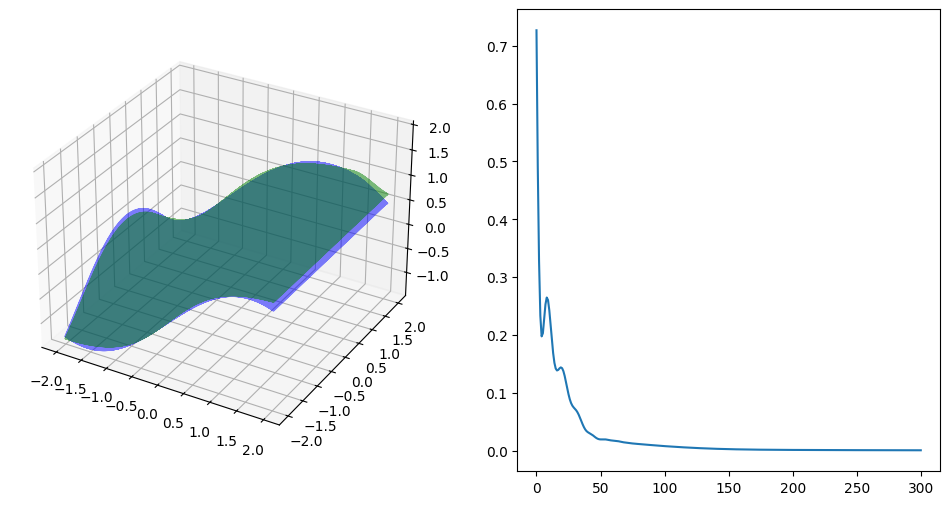

In [ ]:
from numpy import meshgrid
from torch import from_numpy

N = 800
g = torch.linspace(-2, 2, N).unsqueeze(1)
X1, X2 = meshgrid(g, g, indexing='ij')
X1, X2 = from_numpy(X1), from_numpy(X2)
y = torch.sin(X1) + torch.cos(X2)

# Il faut convertir X1, X2 et y en matrices (N*N, 1)
X1, X2 = X1.reshape(-1, 1), X2.reshape(-1, 1)
X = torch.cat([X1, X2], dim=1).float()

y = y.reshape(-1, 1).float()

class MLP(Module):
  def __init__(self, neurons):
    super(MLP, self).__init__()
    self.fc1 = Linear(2, neurons)
    self.fc2 = Linear(neurons, 1)
    self.tanh = Tanh()

  def forward(self, x):
    x = self.tanh(self.fc1(x))
    return self.fc2(x)

losses = []
model = MLP(neurons=50)
criterion = criterionLoss()
optimizer = Adam(model.parameters(), lr=1e-2)
epoch = 0

for _ in range(1000):
  epoch += 1
  optimizer.zero_grad()
  loss = criterion(model(X), y)
  loss.backward()
  optimizer.step()
  losses.append(loss)

  if loss < 0.001:
    print(f'Arrêt à l\'epoch : {epoch}')
    break

with no_grad():
  plt.figure(figsize=(12, 6))
  plt.subplot(121, projection='3d')
  plt.plot(X1, X2, y, 'b', alpha=0.5)
  plt.plot(X1, X2, model(X), 'g', alpha=0.5)
  plt.subplot(122)
  plt.plot(losses)

In [ ]:
# Exercice Supplémentaire 2

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            10
├─Linear: 1-2                            6
├─Tanh: 1-3                              --
Total params: 16
Trainable params: 16
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            100
├─Linear: 1-2                            51
├─Tanh: 1-3                              --
Total params: 151
Trainable params: 151
Non-trainable params: 0


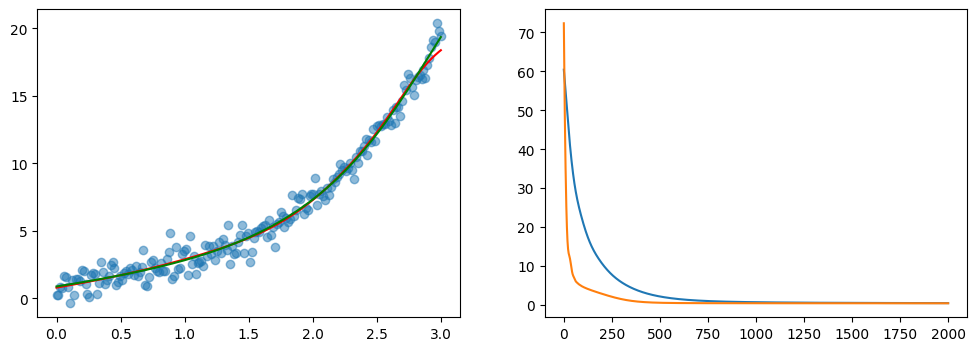

In [ ]:
from torchsummary import summary

torch.manual_seed(0)

N = 200
X = torch.linspace(0, 3, N).unsqueeze(1)
y = torch.exp(X) + 0.7 * torch.randn_like(X)

class MLP(Module):
  def __init__(self, neurons):
    super(MLP, self).__init__()
    self.fc1 = Linear(1, neurons)
    self.fc2 = Linear(neurons, 1)
    self.tanh = Tanh()

  def forward(self, x):
    x = self.tanh(self.fc1(x))
    return self.fc2(x)

criterion = criterionLoss()
model = MLP(neurons=5)
model_l = MLP(neurons=50)
optimizer = Adam(model.parameters(), lr=1e-2)
optimizer_l = Adam(model_l.parameters(), lr=1e-2)

losses = []
losses_l = []

for _ in range(2000):
  optimizer.zero_grad()
  optimizer_l.zero_grad()
  loss = criterion(model(X), y)
  loss_l = criterion(model_l(X), y)
  loss.backward()
  loss_l.backward()
  optimizer.step()
  optimizer_l.step()
  losses.append(loss)
  losses_l.append(loss_l)

summary(model)
summary(model_l)

with no_grad():
  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.scatter(X, y, alpha=0.5)
  plt.plot(X, model(X), 'r')
  plt.plot(X, model_l(X), 'g')
  plt.subplot(122)
  plt.plot(losses)
  plt.plot(losses_l)